# Problem Statement


Data Science job's salaries can be difficult to analyse and predict, due to the myriad factors that can affect it. Therefore, we have chosen to use a large dataset covering many entries featuring salaries of different jobs under different circumstances.

Through this, we hope to offer a resource for job-seekers and employees to utilise to understand the job market for Data Science and therefore, be able to pursue higher-paying jobs.

We aim to achieve this by using statistical techniques and machine learning algorithms to analyse and predict trends and relationships in salaries, to as to more easily find and convey what circumstances would naturally allow for a higher-salary jobs for individuals to utilise.

# Basic Imports


In [1]:
# NOTE: Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# NOTE: Set the default Seaborn style for graphics
sb.set()

In [2]:
salaries = pd.read_csv('salaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


# Cleaning Data Set

In [3]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...,...,...
13967,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13968,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13969,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13970,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
# NOTE: Loading info and dtype of dataset imported
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
# NOTE: Calculating percentage of "US" entries in "company_location"
country = list(salaries["company_location"])
us_count = country.count("US")

print("% US entries: " + str(round(us_count/len(country)*100, 2)))

% US entries: 87.46


In [6]:
# NOTE: Calculating percentage of "US" entries in "employee_residence"
country = list(salaries["employee_residence"])
us_count = country.count("US")

print("% US entries: " + str(round(us_count/len(country)*100, 2)))

% US entries: 87.11


In [7]:
# NOTE: Calculating percentage of "FT" entries in "employment_type"
employ = list(salaries["employment_type"])
ft_count = employ.count("FT")

print("% FT entries: " + str(round(ft_count/len(employ)*100, 2)))

% FT entries: 99.57


Note: Since 87.46% & 87.11% of the entries for company and employee location respectively in the dataset come from the US, and 99.57% of the entries for employment type come from FT employment, we've decided to narrow down the scope of our analysis to US FT entries only.

In [8]:
# NOTE: Calculating percentage of "0" entries (low remote ratio) in "remote_ratio"
remote = list(salaries["remote_ratio"])
low_count = remote.count(0)

print("% low entries: " + str(round(low_count/len(remote)*100, 2)))

% low entries: 65.8


Note: Since 65.8% of the entries for remote ratio come from low remote ratio, it serves as the majority value for available entry types, and remote ratio specifically is much more directly affected by external factors at the time (e.g. stay-in policies, lockdowns mandating remote capacity from companies), we felt remote ratio would not have as strong tie to company preferences and salaries, and therefore, it would be more effective to narrow down remote ratio to the value with the most available entries and remove it from consideration.

In [9]:
# NOTE: Editing csv

salariess = salaries.copy()

# NOTE: Narrowing range to US FT companies and employees with low remote ratio
salariess = salariess.drop(salaries[ (salaries['employee_residence'] != 'US') | (salaries['company_location'] != 'US') | (salaries['employment_type'] != "FT") | (salaries['remote_ratio'] != 0)].index)

# NOTE: Dropping narrowed / unnecessary columns
salariess = salariess.drop(columns=['salary', 'salary_currency', 'employment_type', 'remote_ratio',  'employee_residence', 'company_location'])

salariess

,work_year,experience_level,job_title,salary_in_usd,company_size
1,2024,SE,Machine Learning Engineer,180500,M
2,2024,SE,Machine Learning Engineer,96200,M
9,2024,SE,Data Scientist,222300,M
10,2024,SE,Data Scientist,119700,M
15,2024,MI,Data Engineer,98000,M
...,...,...,...,...,...
13916,2021,SE,Data Analytics Manager,120000,L
13924,2021,SE,Data Engineer,165000,M
13953,2021,MI,Data Analyst,75000,L
13954,2021,MI,Data Analyst,62000,L


In [10]:
salariess['job_title'].nunique()

90

Given the many possible types of job_titles, we felt it would be too ineffective to track and utilise the category as is (especially given how some entries may overlap with one another like 'Machine Learning Operations Engineer' and 'ML Ops Engineer', but would be treated differently), we figured a more effective way to use job_title would be to group seperate entries into broader groups serving as a purview for the jobs in those broader groups.

In [11]:
#  NOTE: Reclassifying and mapping data points to categorise them for easy visualisation

job_class = { 'Data Modeler':'Data Analysis',
              'Data Analyst':'Data Analysis',
              'BI Analyst':'Data Analysis',
              'Lead Data Analyst':'Data Analysis',
              'Data Analytics Lead':'Data Analysis',
              'Decision Scientist':'Data Analysis',
              'Data Visualization Specialist':'Data Analysis',
              'Data Visualization Analyst':'Data Analysis',
              'Data Visualization Engineer':'Data Analysis',
              'Data Manager':'Data Analysis',
              'Data Analytics Manager':'Data Analysis',
              'Analytics Engineer':'Data Analysis',
              'Data Analytics Specialist':'Data Analysis',
              'Data Analytics Consultant':'Data Analysis',
              'Data Lead':'Data Analysis',
              'Head of Data':'Data Analysis',
              'Data Management Consultant':'Data Analysis',

              'Data Science':'Data Science',
              'Data Scientist':'Data Science',
              'Principal Data Scientist':'Data Science',
              'Data Specialist':'Data Science',
              'Machine Learning Engineer':'Data Science',
              'ML Engineer':'Data Science',
              'Applied Scientist':'Data Science',
              'Data Science Lead':'Data Science',
              'Data Science Consultant':'Data Science',
              'Data Science Manager':'Data Science',
              'Data Science Engineer':'Data Science',
              'Data Science Director':'Data Science',
              'Data Science Practitioner':'Data Science',
              'Director of Data Science':'Data Science',
              'Head of Data Science':'Data Science',

              'Data Engineer':'Software Engineering',
              'Lead Data Engineer':'Software Engineering',
              'Data Developer':'Software Engineering',
              'Big Data Developer':'Software Engineering',
              'Data Integration Developer':'Software Engineering',
              'Data Architect':'Software Engineering',
              'Data Integration Engineer':'Software Engineering',
              'Data Integration Specialist':'Software Engineering',
              'Data Infrastructure Engineer':'Software Engineering',
              'Data Pipeline Engineer':'Software Engineering',
              'Data Operations Engineer':'Software Engineering',
              'ETL Developer':'Software Engineering',

              'Machine Learning Scientist':'AI & Machine Learning',
              'Machine Learning Engineer':'AI & Machine Learning',
              'Machine Learning Software Engineer':'AI & Machine Learning',
              'Machine Learning Infrastructure Engineer':'AI & Machine Learning',
              'Machine Learning Operations Engineer':'AI & Machine Learning',
              'ML Ops Engineer':'AI & Machine Learning',
              'Machine Learning Modeler':'AI & Machine Learning',
              'Applied Machine Learning Engineer':'AI & Machine Learning',
              'Applied Machine Learning Scientist':'AI & Machine Learning',
              'Head of Machine Learning':'AI & Machine Learning',
              'Deep Learning Engineer':'AI & Machine Learning',
              'AI Engineer':'AI & Machine Learning',
              'AI Scientist':'AI & Machine Learning',
              'AI Developer':'AI & Machine Learning',
              'AI Architect':'AI & Machine Learning',
              'AI Product Manager':'AI & Machine Learning',

              'Robotics Engineer':'Specialization',
              'Robotics Software Engineer':'Specialization',
              'MLOps Engineer':'Specialization',
              'NLP Engineer':'Specialization',
              'Computer Vision Engineer':'Specialization',
              'Data Strategist':'Specialization',

              'Data Quality Engineer':'Operation',
              'Data Quality Analyst':'Operation',
              'Data Operations Analyst':'Operation',
              'Data Operations Specialist':'Operation',
              'Data Operations Associate':'Operation',
              'Data Product Manager':'Operation',
              'Financial Data Analyst':'Operation',

              'Research Engineer':'Research',
              'AI Research Engineer':'Research',
              'Machine Learning Researcher':'Research',
              'Prompt Engineer':'Research',
              'Research Scientist':'Research',
              'Research Analyst':'Research',
              'Quantitative Research Analyst':'Research',
              'Data Management Analyst':'Research',
              'Data Management Specialist':'Research',

              'Business Intelligence':'Business Intelligence',
              'Business Intelligence Engineer':'Business Intelligence',
              'Business Intelligence Analyst':'Business Intelligence',
              'Business Intelligence Developer':'Business Intelligence',
              'BI Developer':'Business Intelligence',
              'BI Data Analyst':'Business Intelligence',
              'Business Data Analyst':'Business Intelligence',
              'Business Intelligence Specialist':'Business Intelligence',
              'Business Intelligence Manager':'Business Intelligence',

              }

salaried = salariess.copy()

# NOTE: New column for new category (chose to keep job_title in case it was needed)
salaried['job_type'] = salaried.loc[:, 'job_title']

# NOTE: Change the values in job type to fit the values in the dictionary
salaried['job_type'] = salaried['job_type'].map(job_class)

# NOTE: Check the new data set
salaried

,work_year,experience_level,job_title,salary_in_usd,company_size,job_type
1,2024,SE,Machine Learning Engineer,180500,M,AI & Machine Learning
2,2024,SE,Machine Learning Engineer,96200,M,AI & Machine Learning
9,2024,SE,Data Scientist,222300,M,Data Science
10,2024,SE,Data Scientist,119700,M,Data Science
15,2024,MI,Data Engineer,98000,M,Software Engineering
...,...,...,...,...,...,...
13916,2021,SE,Data Analytics Manager,120000,L,Data Analysis
13924,2021,SE,Data Engineer,165000,M,Software Engineering
13953,2021,MI,Data Analyst,75000,L,Data Analysis
13954,2021,MI,Data Analyst,62000,L,Data Analysis


In [12]:
# NOTE: Experience level was incremental across entry types
# NOTE: (e.g. experience amount generally would increase from EN to MI to SE to EX)
def replace_level(x):
    if x == 'EN':
        return '1'
    if x == 'MI':
        return '2'
    if x == 'SE':
        return '3'
    if x == 'EX':
        return '4'

# NOTE: Company size was incremental across entry types
# NOTE: (e.g. number of employees generally would increase from S to M to L)
def replace_size(x):
    if x == 'S':
        return '1'
    if x == 'M':
        return '2'
    if x == 'L':
        return '3'

# NOTE: To convert experience_level to company_size to numeric categories
salaried['experience_level'] = salaried['experience_level'].apply(replace_level)
salaried['company_size'] = salaried['company_size'].apply(replace_size)

salaried['experience_level'] = salaried['experience_level'].astype(int)
salaried['company_size'] = salaried['company_size'].astype(int)

# NOTE: This will be used later, in place of salaried directly, for prediction model, irrelevant for now
backup = salaried.copy()

salaried

,work_year,experience_level,job_title,salary_in_usd,company_size,job_type
1,2024,3,Machine Learning Engineer,180500,2,AI & Machine Learning
2,2024,3,Machine Learning Engineer,96200,2,AI & Machine Learning
9,2024,3,Data Scientist,222300,2,Data Science
10,2024,3,Data Scientist,119700,2,Data Science
15,2024,2,Data Engineer,98000,2,Software Engineering
...,...,...,...,...,...,...
13916,2021,3,Data Analytics Manager,120000,3,Data Analysis
13924,2021,3,Data Engineer,165000,2,Software Engineering
13953,2021,2,Data Analyst,75000,3,Data Analysis
13954,2021,2,Data Analyst,62000,3,Data Analysis


In [13]:
salaried.head()

,work_year,experience_level,job_title,salary_in_usd,company_size,job_type
1,2024,3,Machine Learning Engineer,180500,2,AI & Machine Learning
2,2024,3,Machine Learning Engineer,96200,2,AI & Machine Learning
9,2024,3,Data Scientist,222300,2,Data Science
10,2024,3,Data Scientist,119700,2,Data Science
15,2024,2,Data Engineer,98000,2,Software Engineering


In [14]:
# NOTE: Checking if the data set has any missing values

salaried.isnull().sum()

work_year           0
experience_level    0
job_title           0
salary_in_usd       0
company_size        0
job_type            0
dtype: int64

# Salary Analaysis

## Salary and Job Type

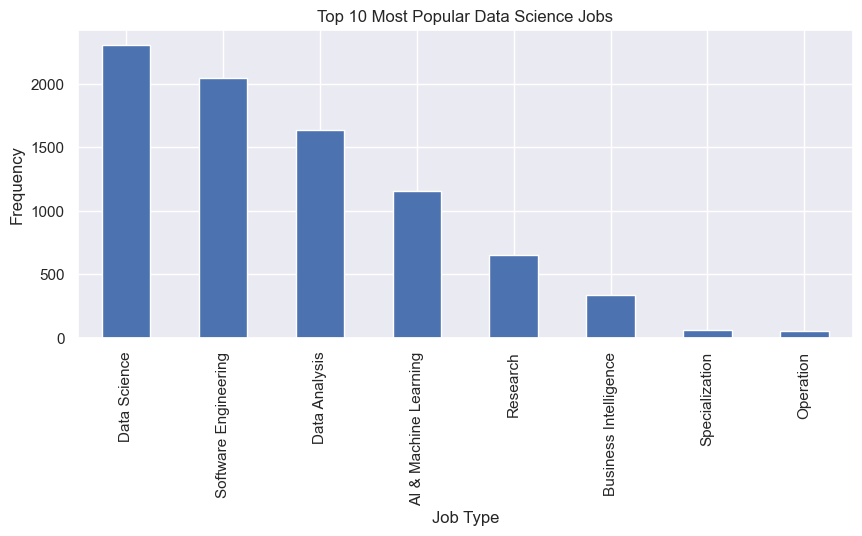

In [15]:
# NOTE: Check for top 10 most frequent job types
top_10_jobs = salaried['job_type'].value_counts().head(8)

# NOTE: Create a bar plot of the top 10 job types
plt.figure(figsize=(10, 4))
top_10_jobs.plot(kind='bar')
plt.title('Top 10 Most Popular Data Science Jobs')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.show()


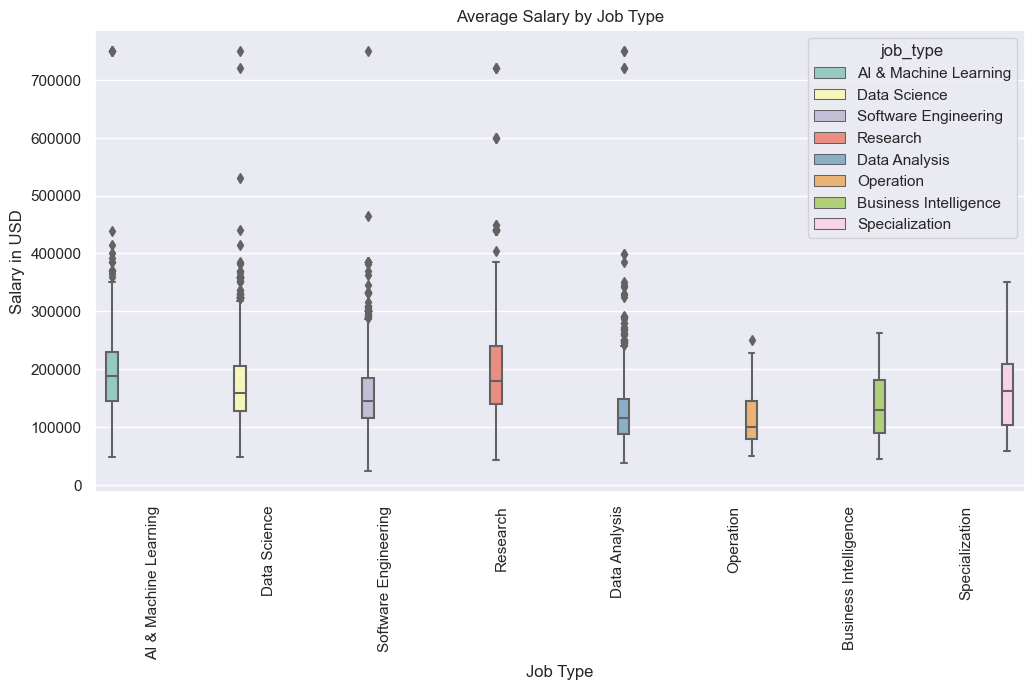

In [16]:
#  NOTE: Create a box plot for the average (mean) salary for each job type
plt.figure(figsize=(12, 6))
sb.boxplot(x='job_type', y='salary_in_usd', data=salaried, hue='job_type', palette='Set3')
plt.xticks(rotation=90)
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary in USD')

plt.show()


/var/folders/7y/qbpvmqc943997rjxxh6rm3nc0000gn/T/ipykernel_9376/1886501017.py:2: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_salaries = salaried.pivot_table(index='job_type', values='salary_in_usd', aggfunc=max)


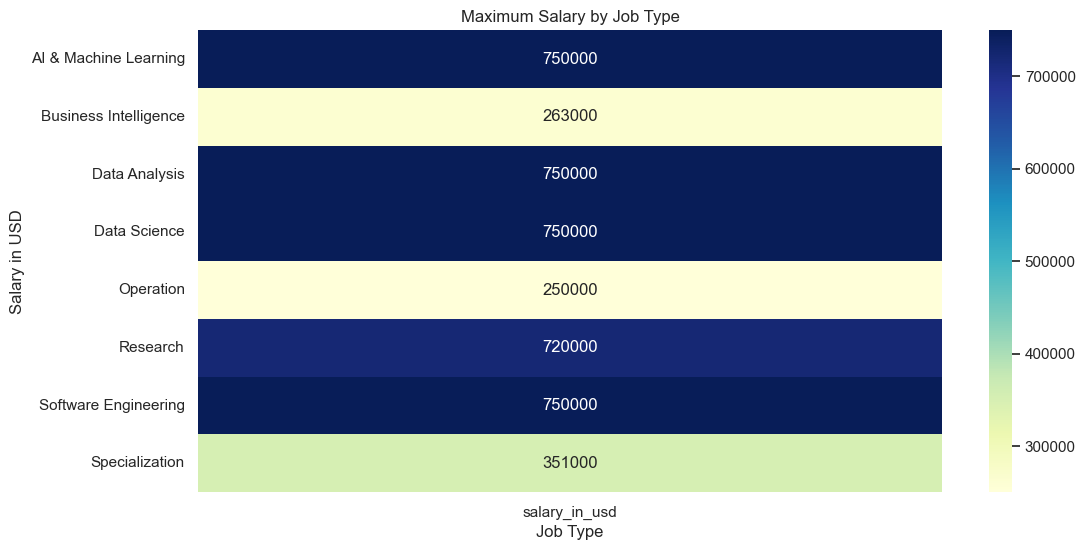

In [17]:
# NOTE: Create a pivot table to get the maximum salary for each job type
max_salaries = salaried.pivot_table(index='job_type', values='salary_in_usd', aggfunc=max)

# NOTE: Create a heatmap of the maximum salaries
plt.figure(figsize=(12, 6))
sb.heatmap(max_salaries, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Maximum Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary in USD')

plt.show()


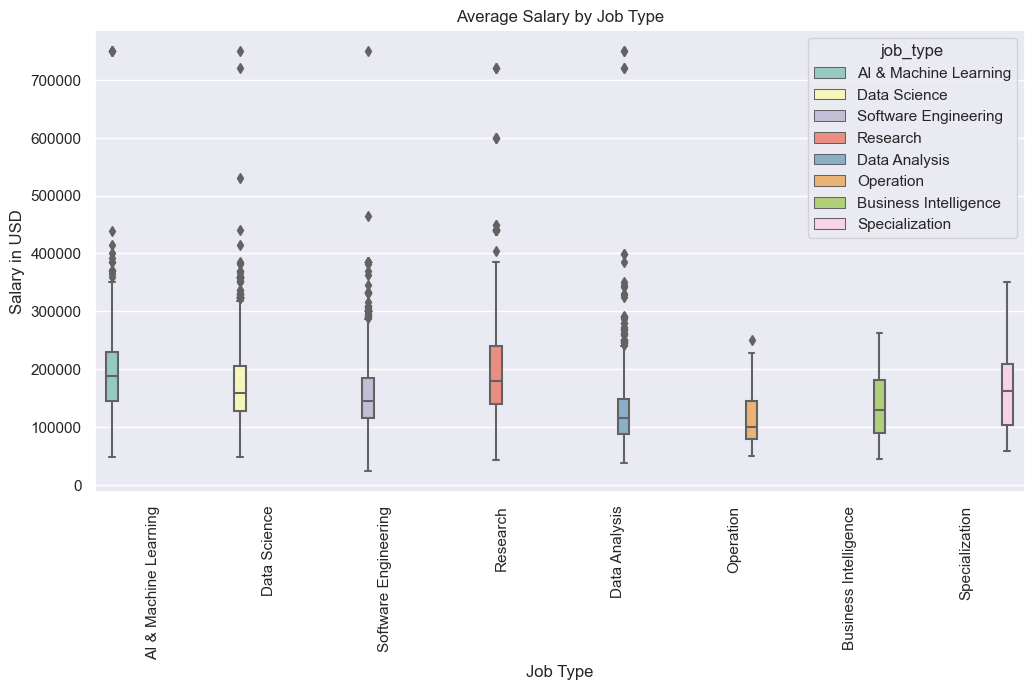

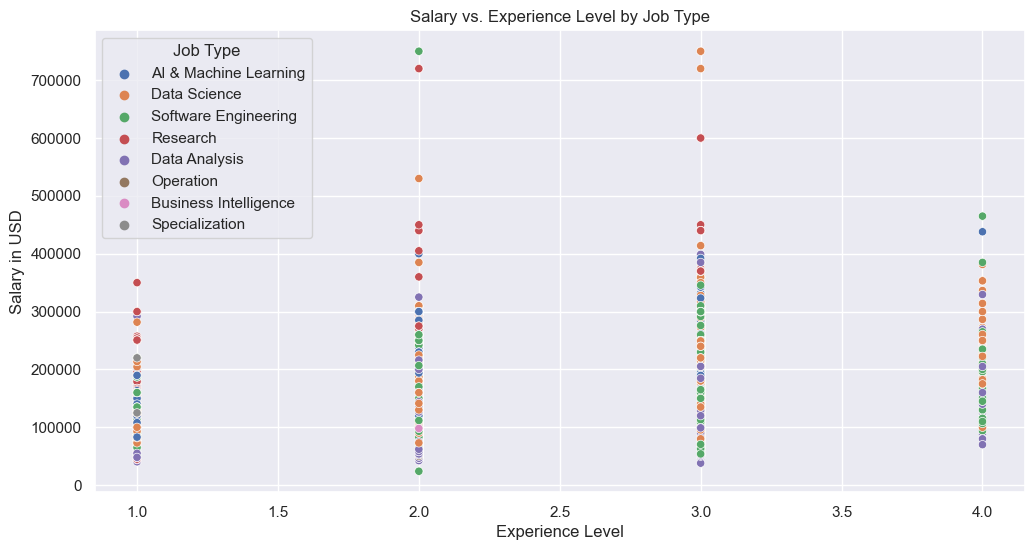

/var/folders/7y/qbpvmqc943997rjxxh6rm3nc0000gn/T/ipykernel_9376/2656026887.py:22: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  grouped_yoy_growth = salaried.groupby(['work_year', 'job_type'])['salary_in_usd'].mean().unstack().pct_change().dropna()
/var/folders/7y/qbpvmqc943997rjxxh6rm3nc0000gn/T/ipykernel_9376/2656026887.py:25: UserWarning: 
The markers list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sb.lineplot(data=grouped_yoy_growth, markers='o')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/py

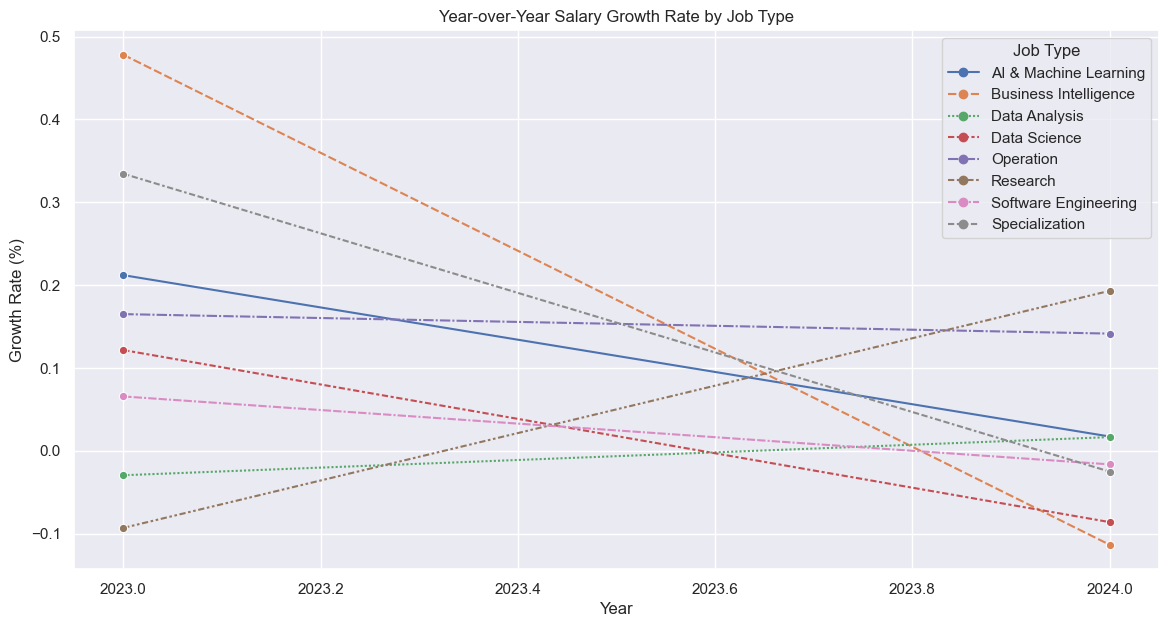

In [19]:
# Grouped Salary and Job Type Analysis

# NOTE: Salary and Job Type - Box Plot
plt.figure(figsize=(12, 6))
sb.boxplot(x='job_type', y='salary_in_usd', data=salaried, hue='job_type', palette='Set3')
plt.xticks(rotation=90)
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary in USD')
plt.show()

# NOTE: Salary and Job Type - Scatter Plot
plt.figure(figsize=(12, 6))
sb.scatterplot(data=salaried, x='experience_level', y='salary_in_usd', hue='job_type')
plt.title('Salary vs. Experience Level by Job Type')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend(title='Job Type')
plt.show()

# NOTE: Salary and Job Type - Year-over-Year Growth Rate
grouped_yoy_growth = salaried.groupby(['work_year', 'job_type'])['salary_in_usd'].mean().unstack().pct_change().dropna()

plt.figure(figsize=(14, 7))
sb.lineplot(data=grouped_yoy_growth, markers='o')
plt.title('Year-over-Year Salary Growth Rate by Job Type')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Job Type')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


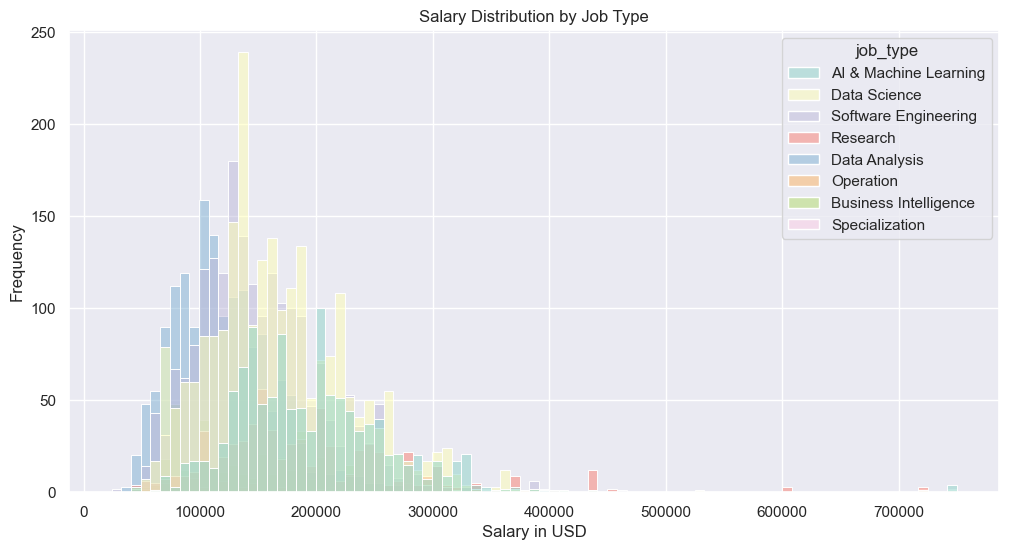

In [20]:
# NOTE: Histogram - Salary & Job Type
plt.figure(figsize=(12, 6))
sb.histplot(data=salaried, x='salary_in_usd', hue='job_type', palette='Set3')
plt.title('Salary Distribution by Job Type')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

## Salary and Company Size

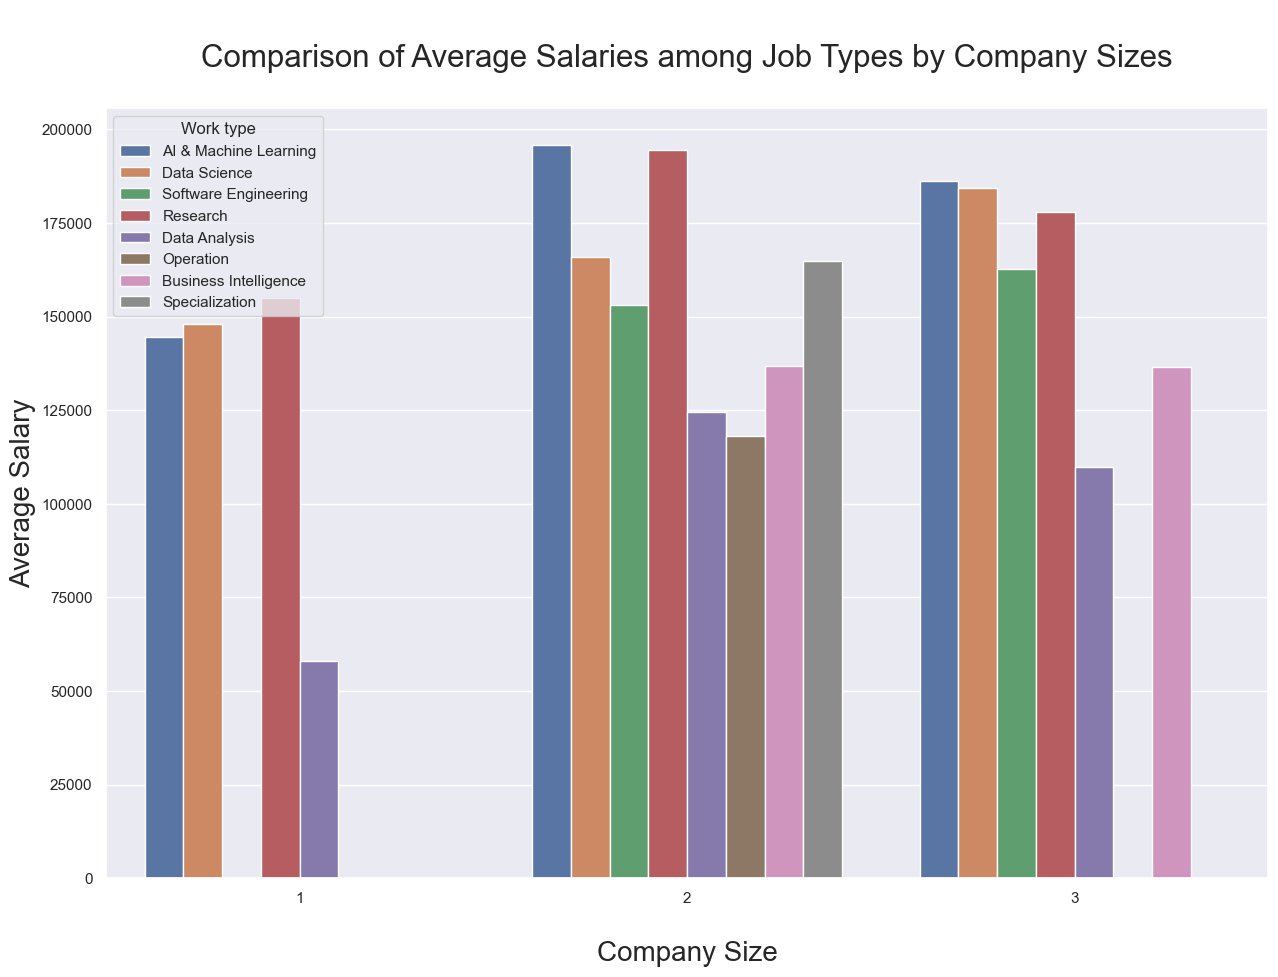

In [21]:
# NOTE: Average wages among different job types by company sizes
plt.subplots(figsize=(15, 10))
p = sb.barplot(data=salaried, x='company_size', y='salary_in_usd', hue='job_type',errorbar=None)
p.set_title('\nComparison of Average Salaries among Job Types by Company Sizes\n', fontsize=22.5)
p.set_xlabel('\nCompany Size', fontsize=20)
p.set_ylabel('Average Salary', fontsize=20)
plt.legend(title='Work type')
plt.show()


## Salary and Experience Level

AttributeError: 'numpy.int64' object has no attribute 'startswith'

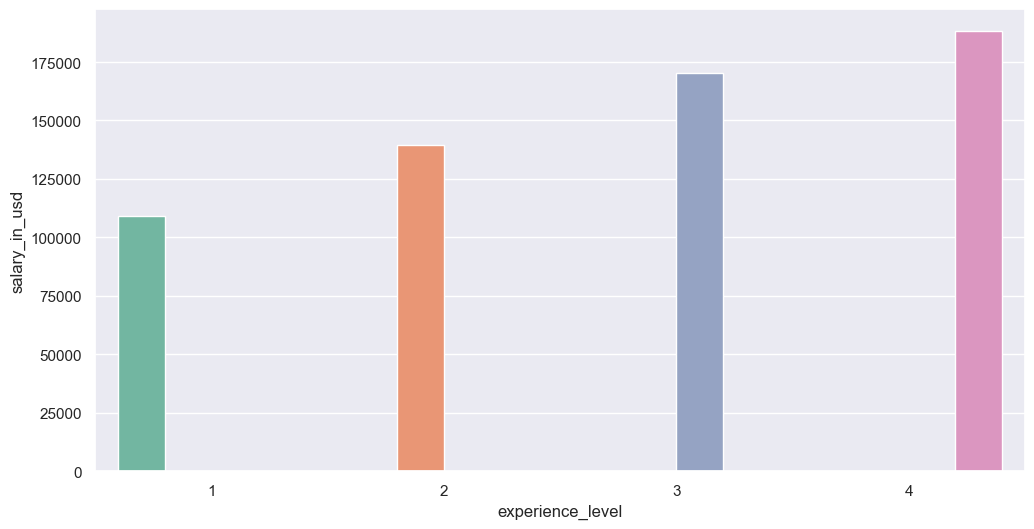

In [22]:
# NOTE: Grouping the data by experience level to see the distribution of salaries
salaried_grouped_exp = salaried.groupby('experience_level')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(x='experience_level', y='salary_in_usd', data=salaried_grouped_exp, hue='experience_level', palette='Set2')
plt.xticks(rotation=0)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


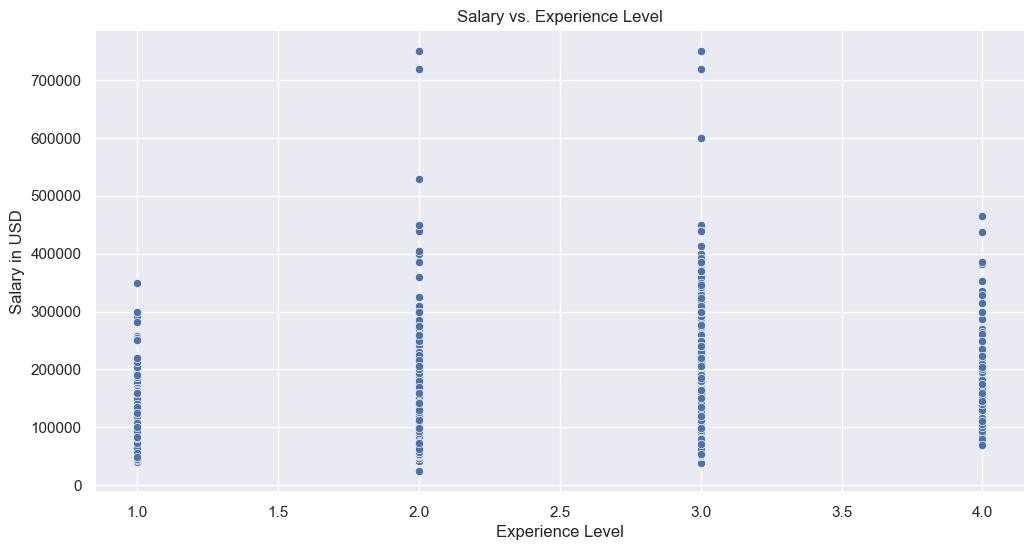

In [23]:
# NOTE: Salary and Experience Level - Scatter Plot
plt.figure(figsize=(12, 6))
sb.scatterplot(data=salaried, x='experience_level', y='salary_in_usd')
plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


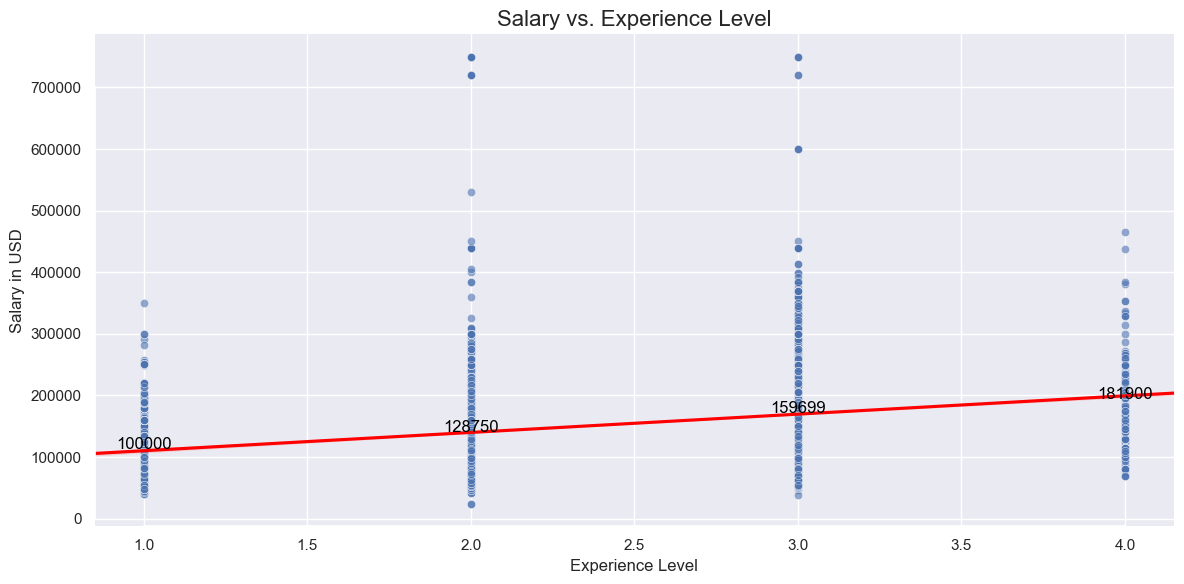

In [24]:
plt.figure(figsize=(12, 6))

# NOTE: Use Seaborn to create a scatter plot with improved aesthetics.
scatter = sb.scatterplot(
    data=salaried,
    x='experience_level',
    y='salary_in_usd',
    alpha=0.6
)

# NOTE: Calculate and plot the median salary for each experience level.
medians = salaried.groupby('experience_level')['salary_in_usd'].median()
for level, median in medians.items():
    plt.text(
        x=level,
        y=median + (salaried['salary_in_usd'].max() * 0.01),  # slightly above the median for readability
        s=f'{median:.0f}',
        color='black',
        ha='center',
        va='bottom'
    )

# NOTE: Plot a trend line.
sb.regplot(
    data=salaried,
    x='experience_level',
    y='salary_in_usd',
    scatter=False,
    color='red',
    truncate=False
)

# NOTE: Set title and labels.
plt.title('Salary vs. Experience Level', size=16)
plt.xlabel('Experience Level', size=12)
plt.ylabel('Salary in USD', size=12)

sb.despine(trim=True)
plt.tight_layout()

plt.show()


Observation:
The above data indicates a general upward trend in salary with increasing experience levels, which points to a positive correlation between experience and salary

## Salary and Year of Work

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


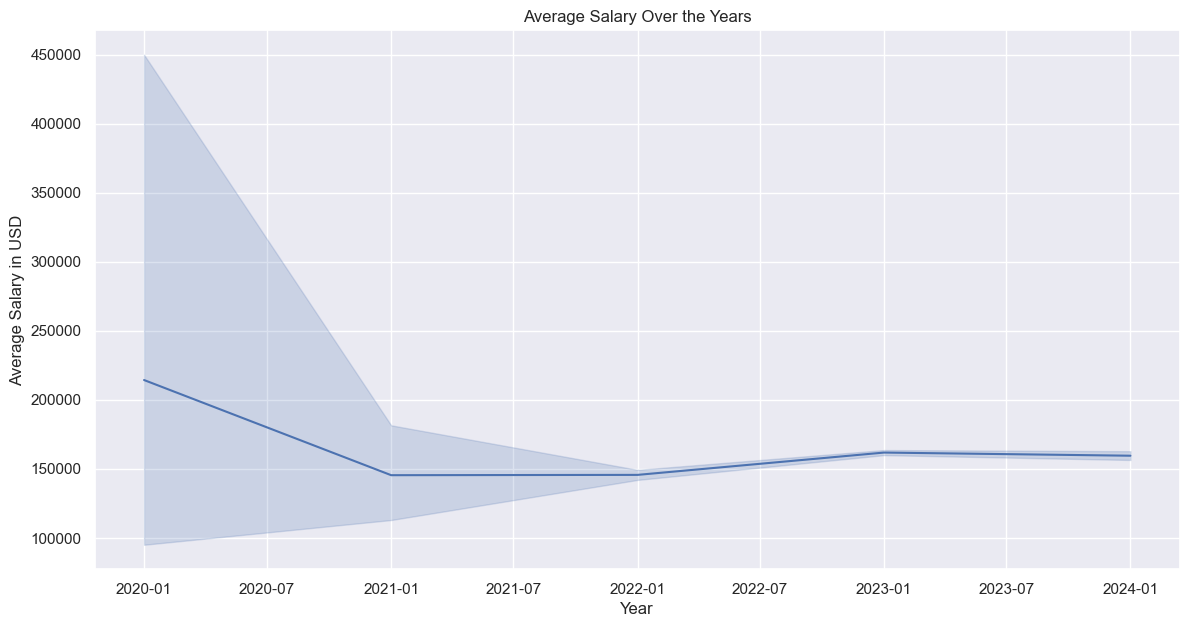

In [25]:
salaried['work_year'] = pd.to_datetime(salaried['work_year'], format='%Y')

# NOTE: Salary and Work Year - Time Series Plot
plt.figure(figsize=(14, 7))
sb.lineplot(data=salaried, x='work_year', y='salary_in_usd', estimator='mean')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()


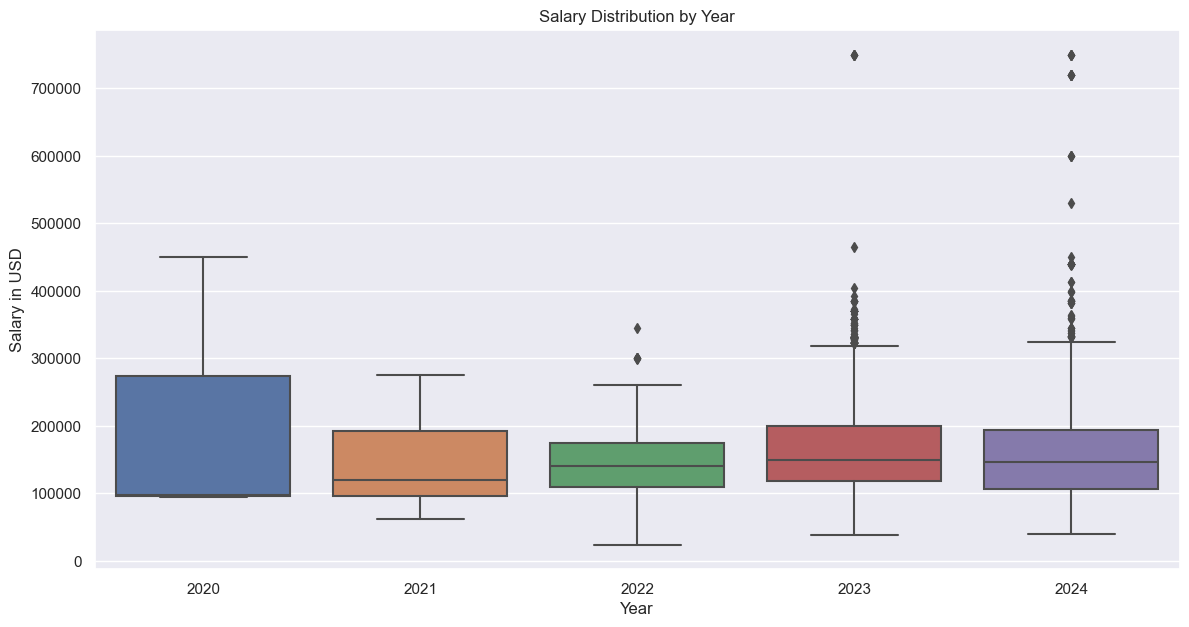

In [26]:
# NOTE: Salary and Work Year - Yearly Salary Distribution
plt.figure(figsize=(14, 7))
sb.boxplot(data=salaried, x=salaried['work_year'].dt.year, y='salary_in_usd')
plt.title('Salary Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


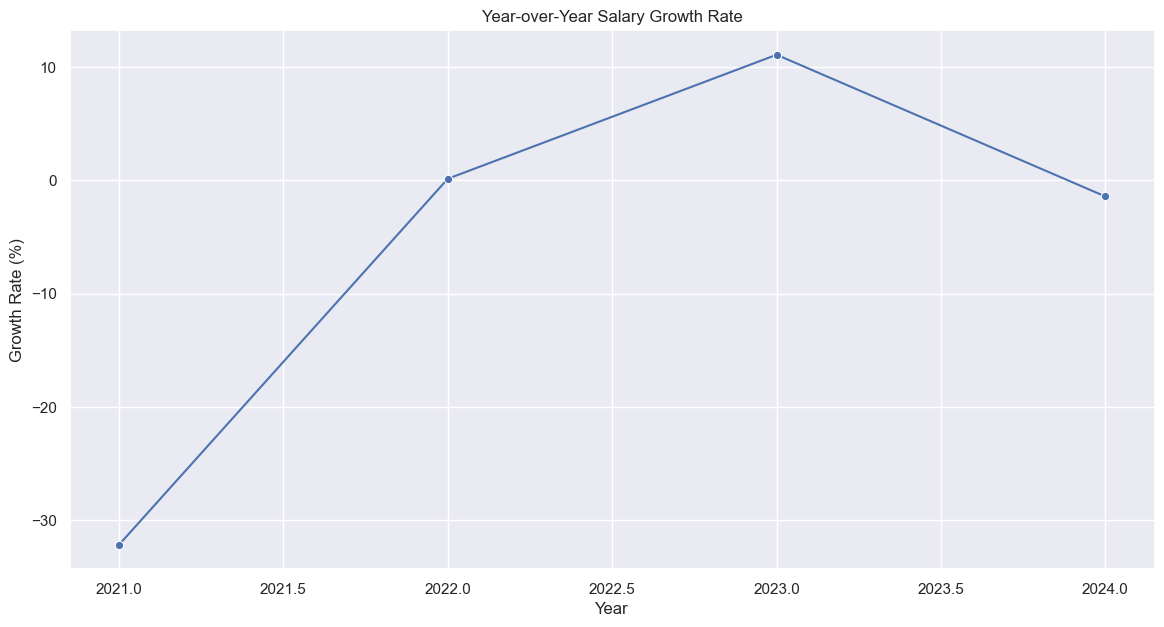

In [27]:
# NOTE: Calculate Year-over-Year Growth Rate
yearly_average_salaries = salaried.groupby(salaried['work_year'].dt.year)['salary_in_usd'].mean()
yoy_growth = (yearly_average_salaries.pct_change() * 100).dropna()

# NOTE: Plot Year-over-Year Growth Rate
plt.figure(figsize=(14, 7))
sb.lineplot(data=yoy_growth, marker='o')
plt.title('Year-over-Year Salary Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


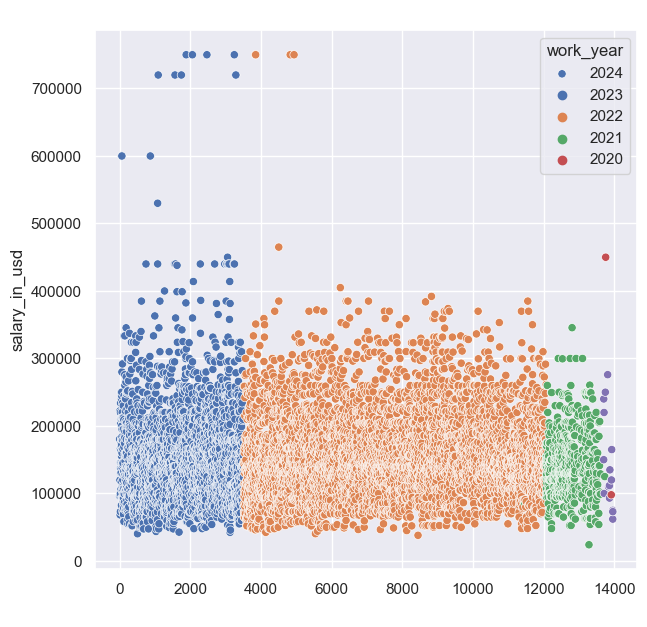

In [28]:
# NOTE: Salary and Work Year - Scatter Plot
f = plt.figure(figsize=(7,7))
sb.scatterplot(data=salaried, x=salaried.index, y='salary_in_usd', hue='work_year').set(xlabel =" ", ylabel = "salary_in_usd", title =' ')
plt.legend(title='work_year', loc='upper right', labels=['2024', '2023', '2022', '2021', '2020'])

# Salary Correlation and Prediction

In [31]:
# NOTE: Further imports required for incoming correlation plot
!pip install dython
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

/opt/anaconda3/lib/python3.11/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/anaconda3/lib/python3.11/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


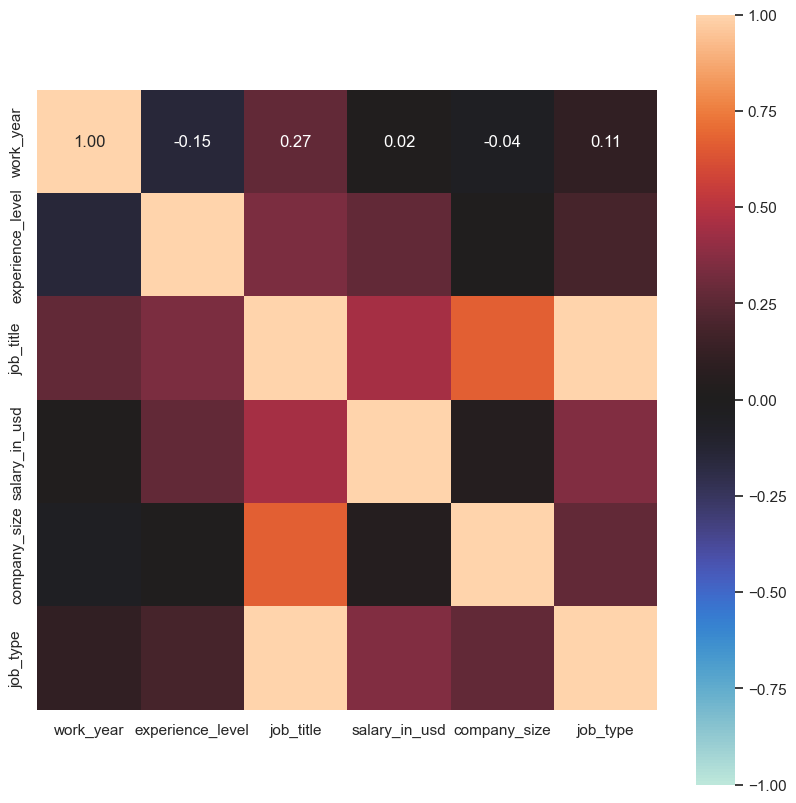

,work_year,experience_level,job_title,salary_in_usd,company_size,job_type
work_year,1.000000,-0.146631,0.267042,0.023191,-0.044364,0.106215
experience_level,-0.146631,1.000000,0.339079,0.273105,0.014162,0.186006
job_title,0.267042,0.339079,1.000000,0.449685,0.668546,0.995017
salary_in_usd,0.023191,0.273105,0.449685,1.000000,0.039201,0.353702
company_size,-0.044364,0.014162,0.668546,0.039201,1.000000,0.269719
job_type,0.106215,0.186006,0.995017,0.353702,0.269719,1.000000


In [32]:
# NOTE: Correlation plot between different categories
complete_correlation = associations(salaried, filename= 'complete_correlation.png', figsize=(10,10))

df_complete_corr=complete_correlation['corr']

styled_df = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None)
styled_df

In [33]:
df = backup.copy()

# NOTE: Define the upper and lower limits
upper_limit = np.percentile(df['salary_in_usd'], 99)
lower_limit = np.percentile(df['salary_in_usd'], 1)

# NOTE: Remove outliers
df = df[(df['salary_in_usd'] < upper_limit) & (df['salary_in_usd'] > lower_limit)]

Goodness of Fit of Model 	Test Dataset
Mean Absolute Error: 41760.089702377496
Root Mean Squared Error: 51787.34635729481
R-squared Score: 0.2147767927121279
Training R-squared: 0.2180614887111918
Testing R-squared: 0.2147767927121279


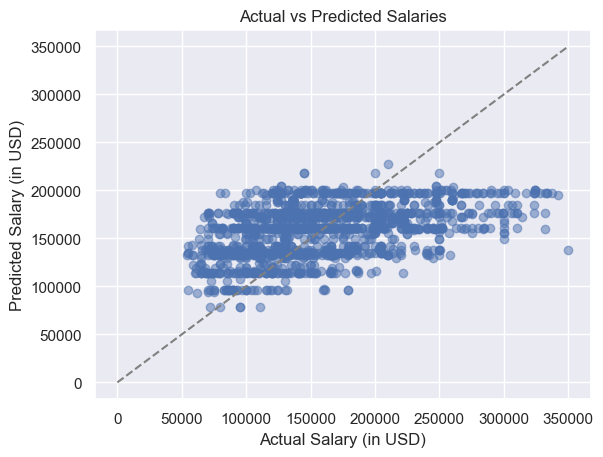

Cross-validation scores: [0.20607745 0.2241966  0.19235196 0.19743855 0.09940038]
Mean CV score: 0.18389298896139555
Std CV score: 0.043613230457900366


In [34]:
# NOTE: Further imports for prediction model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# NOTE: Selecting response and predictors
X = df.drop(columns=['salary_in_usd', 'job_title'], axis=1) #all variables except salary_in_usd
# X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'employment_type', 'remote_ratio',  'employee_residence', 'company_location'])
y = df['salary_in_usd']

# NOTE: Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# NOTE: Using a 80/20 split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)


# NOTE: Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# NOTE: Evaluate the model's performance
# NOTE: Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared Score:", r2_score(y_test, y_pred))

# NOTE: Predict on the testing set and calculate R-squared
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)


# NOTE: Create a scatter plot of actual vs predicted salaries
plt.scatter(y_test, y_pred, alpha=0.5)

# NOTE: Add a diagonal line to represent perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='grey')

plt.xlabel('Actual Salary (in USD)')
plt.ylabel('Predicted Salary (in USD)')
plt.title('Actual vs Predicted Salaries')
plt.show()



# NOTE: Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)

# NOTE: Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# NOTE: Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Std CV score:", np.std(cv_scores))


Insights:

We have chosen Gradient Boosting Regressor, which constructs a series of decision trees incrementally. Each new tree corrects the errors of the previous ones, and the combination of these trees provides improved predictive accuracy.
We have also chosen to split our available data in a 80:20 train:test ratio to run the algorithm on.

To analyse the prediction results we used various methods to calculate its effectiveness and accuracy. Some of those would be:

1) MEAN ABSOLUTE ERROR & ROOT MEAN SQUARED ERROR:
Provide benchmarks to guage how accurate the predictions were by calculating the average of the differences between the predicted and actual values in two distinct ways.

The calculated mean error is $41,760.

The calculated root mean error is $51,787.

The above two values provide an approximate of how far predicted values were, on average, from the actual salaries.

2) CROSS-VALIDATION:
We used Cross-Validation to calculate the mean CV score and Std CV score.
Mean value is (0.183) and the low standard deviation is (0.043), indicating that the model, on average, performs well across different subsets of data.









In [35]:
# NOTE: Get the feature importances
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)

# NOTE: Print the feature importances
print(importances)

                                Importance
experience_level                  0.423666
job_type_Data Analysis            0.239540
job_type_AI & Machine Learning    0.116815
job_type_Software Engineering     0.052892
job_type_Research                 0.038719
work_year                         0.033794
job_type_Business Intelligence    0.031991
job_type_Data Science             0.026402
company_size                      0.024492
job_type_Operation                0.010180
job_type_Specialization           0.001510


The top few rows are the most important in predicting our target variable. As anticipated by earlier graph comparing average salary and experience level, eperience level seems to have a high importance / connection to predicting salary. Different job types would take up the following top slots, indicating how closely relevant, and very likely, the many available entries from those job types that allow for the model to analyse and predict off of.